# Visulalisation

In [3]:
import pandas as pd
import seaborn as sns

In [45]:
# Load DataFrame
import pickle
path = './data/df_results.pickle'
with open(path, 'rb') as f:
    df_results = pickle.load(f)

In [46]:
df_results = df_results.reset_index()

In [47]:
df_results.head()

,method,eta,epsilon,n_steps,loss,accuracy
0,pgd_infinity,0.0,0.0,1,1.402358,0.7481
1,pgd_infinity,0.0,0.0,2,1.402358,0.7481
2,pgd_infinity,0.0,0.0,3,1.402358,0.7481
3,pgd_infinity,0.0,0.0,4,1.402358,0.7481
4,pgd_infinity,0.0,0.2,1,1.402358,0.7481


In [48]:
df_results

,method,eta,epsilon,n_steps,loss,accuracy
0,pgd_infinity,0.0,0.0,1,1.402358,0.7481
1,pgd_infinity,0.0,0.0,2,1.402358,0.7481
2,pgd_infinity,0.0,0.0,3,1.402358,0.7481
3,pgd_infinity,0.0,0.0,4,1.402358,0.7481
4,pgd_infinity,0.0,0.2,1,1.402358,0.7481
...,...,...,...,...,...,...
195,pgd_random,0.4,0.6,4,267.880371,0.0001
196,pgd_random,0.4,0.8,1,74.211563,0.0056
197,pgd_random,0.4,0.8,2,171.223221,0.0005
198,pgd_random,0.4,0.8,3,241.551849,0.0000


In [52]:
1/255

0.00392156862745098

In [51]:
(df_results.epsilon <=df_results.eta).sum()

72

In [38]:
df_results = df_results.loc[df_results.epsilon > df_results.eta]
df_results = df_results[(df_results.eta != 0) & (df_results.epsilon !=0)]

In [39]:
df_results

,method,eta,epsilon,n_steps,loss,accuracy
24,pgd_infinity,0.1,0.2,1,22.435295,0.0663
25,pgd_infinity,0.1,0.2,2,70.699875,0.0081
26,pgd_infinity,0.1,0.2,3,106.052528,0.0047
27,pgd_infinity,0.1,0.2,4,135.753693,0.0042
28,pgd_infinity,0.1,0.4,1,22.435295,0.0663
...,...,...,...,...,...,...
195,pgd_random,0.4,0.6,4,267.880371,0.0001
196,pgd_random,0.4,0.8,1,74.211563,0.0056
197,pgd_random,0.4,0.8,2,171.223221,0.0005
198,pgd_random,0.4,0.8,3,241.551849,0.0000


In [44]:
df_results[(df_results.n_steps == 1)]

,method,eta,epsilon,n_steps,loss,accuracy
24,pgd_infinity,0.1,0.2,1,22.435295,0.0663
28,pgd_infinity,0.1,0.4,1,22.435295,0.0663
32,pgd_infinity,0.1,0.6,1,22.435295,0.0663
36,pgd_infinity,0.1,0.8,1,22.435295,0.0663
48,pgd_infinity,0.2,0.4,1,22.475418,0.0886
52,pgd_infinity,0.2,0.6,1,22.475418,0.0886
56,pgd_infinity,0.2,0.8,1,22.475418,0.0886
68,pgd_infinity,0.3,0.4,1,23.517717,0.1088
72,pgd_infinity,0.3,0.6,1,23.517717,0.1088
76,pgd_infinity,0.3,0.8,1,23.517717,0.1088


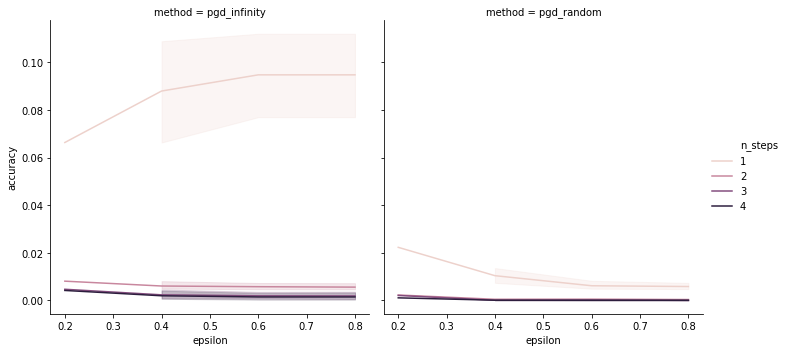

In [42]:
g = sns.relplot(x="epsilon", y="accuracy",
                 col="method", hue='n_steps',
                 kind="line", data=df_results.reset_index())

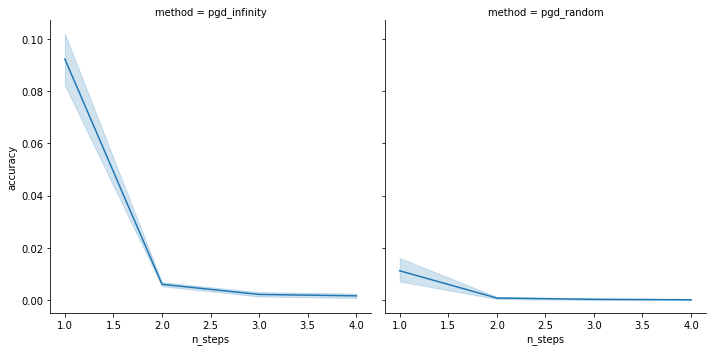

In [32]:
g = sns.relplot(x="n_steps", y="accuracy",
                 col="method",
                 kind="line", data=df_results.reset_index())

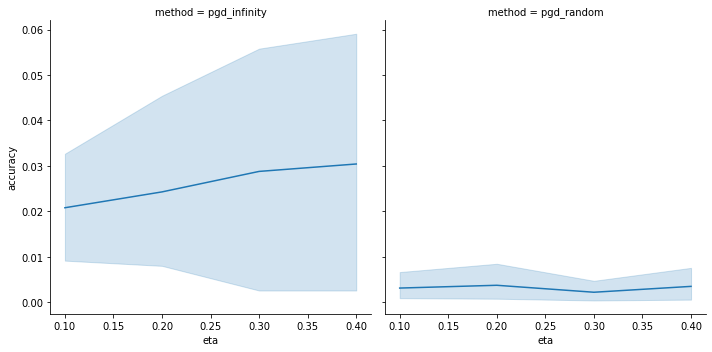

In [33]:
g = sns.relplot(x="eta", y="accuracy",
                 col="method",
                 kind="line", data=df_results.reset_index())

In [53]:
import tensorflow as tf

(_, _), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [54]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        